<a href="https://colab.research.google.com/github/Naman1232/ML-PROJECTS/blob/main/ML_PROJECT_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Trend Prediction**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351055,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [65]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908997,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974495,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342972,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316269,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733643,144114400


In [66]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351055,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [67]:

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351055,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


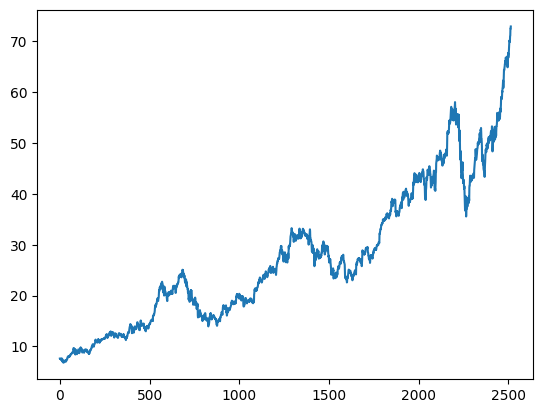

In [68]:
plt.plot(df.Close)

In [69]:
ma100=df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


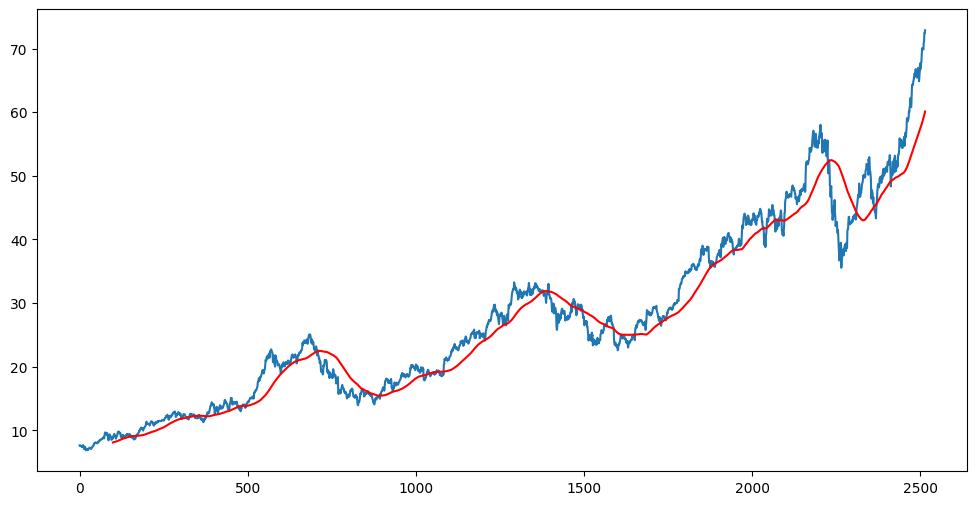

In [70]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [71]:
ma200=df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,54.132313
2511,54.261513
2512,54.396763
2513,54.529350


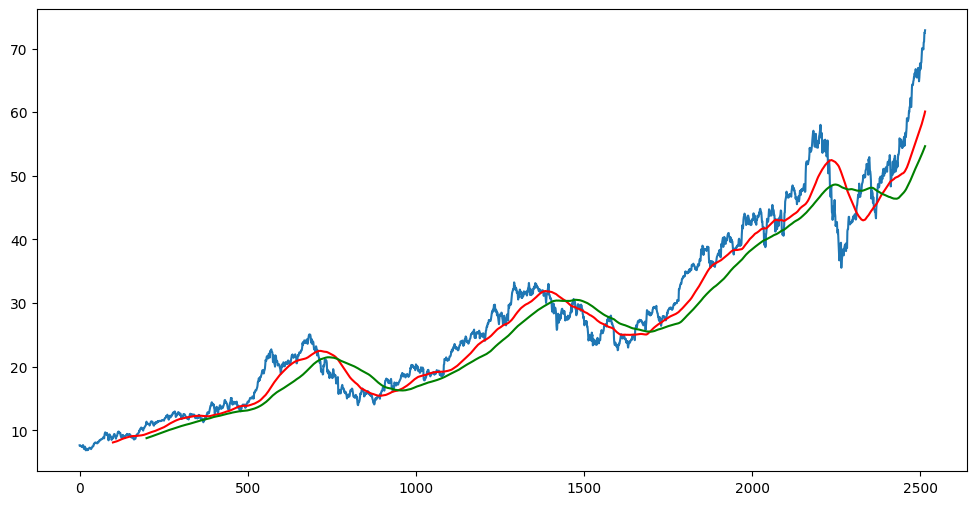

In [72]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [73]:
df.shape

(2515, 7)

In [74]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [75]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [76]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [78]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [79]:
data_training_array.shape

(1760, 1)

In [80]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [81]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [82]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))


model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 120)            │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100, 1)              │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - loss: 0.1813
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 287ms/step - loss: 0.0784
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - loss: 0.0748
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - loss: 0.0712
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - loss: 0.0698
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - loss: 0.0695
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 0.0693
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - loss: 0.0683
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - loss: 0.0663
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - loss: 0.0682
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - loss: 0.0702
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - loss: 0.0681
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 316ms/step - loss: 0.0659
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - loss: 0.0672
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [85]:
model.save('keras_model.h5')

In [86]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [87]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [88]:
past_100_days=data_training.tail(100)

In [143]:


final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [144]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [145]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [146]:
input_data.shape

(855, 1)

In [178]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [179]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [180]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


In [181]:

y_predicted.shape

(755, 100, 1)

In [182]:
y_predicted = y_predicted[:, -1, :]


In [183]:
y_predicted.shape

(755, 1)

In [184]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [185]:

y_predicted

array([[0.49014357],
       [0.4901442 ],
       [0.4901441 ],
       [0.49014348],
       [0.4901424 ],
       [0.49014127],
       [0.49014053],
       [0.49014068],
       [0.49014172],
       [0.4901436 ],
       [0.4901459 ],
       [0.4901482 ],
       [0.49015045],
       [0.4901526 ],
       [0.4901545 ],
       [0.4901561 ],
       [0.49015746],
       [0.49015844],
       [0.4901597 ],
       [0.49016136],
       [0.49016342],
       [0.49016553],
       [0.4901674 ],
       [0.49017125],
       [0.49017766],
       [0.49018633],
       [0.49019682],
       [0.4902087 ],
       [0.49022135],
       [0.49023408],
       [0.490246  ],
       [0.49025694],
       [0.4902674 ],
       [0.4902776 ],
       [0.4902873 ],
       [0.49029633],
       [0.49030492],
       [0.4903131 ],
       [0.49032053],
       [0.49032697],
       [0.49033248],
       [0.49033716],
       [0.4903423 ],
       [0.490348  ],
       [0.49035442],
       [0.49036103],
       [0.4903676 ],
       [0.490

In [191]:
import pandas as pd

df_predicted = pd.DataFrame(y_predicted, columns=["Predicted Values"])
print(df_predicted)


     Predicted Values
0           23.345539
1           23.345568
2           23.345564
3           23.345535
4           23.345484
..                ...
750         23.823114
751         23.825516
752         23.827972
753         23.830559
754         23.833290

[755 rows x 1 columns]


In [186]:
scaler.scale_

array([0.02123255])

In [187]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

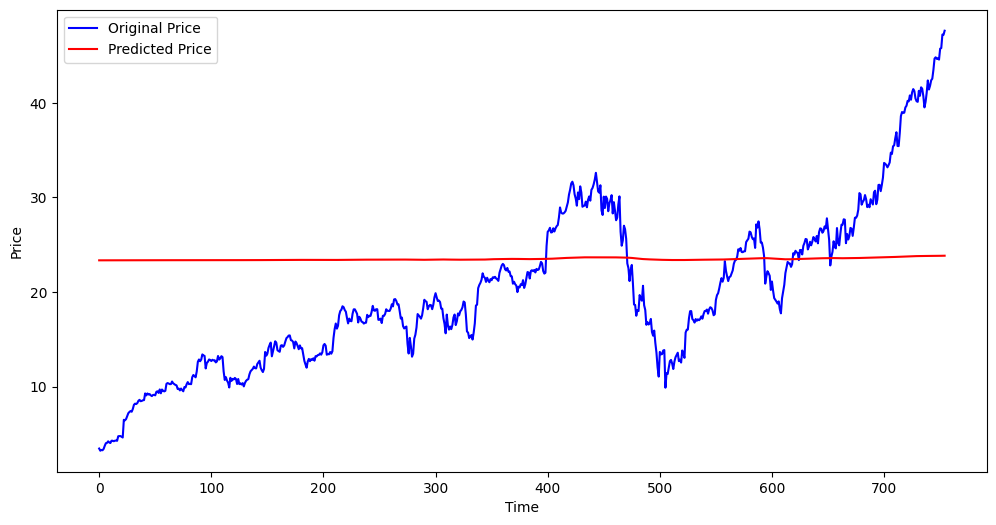

In [188]:
plt.figure(figsize=(12, 6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



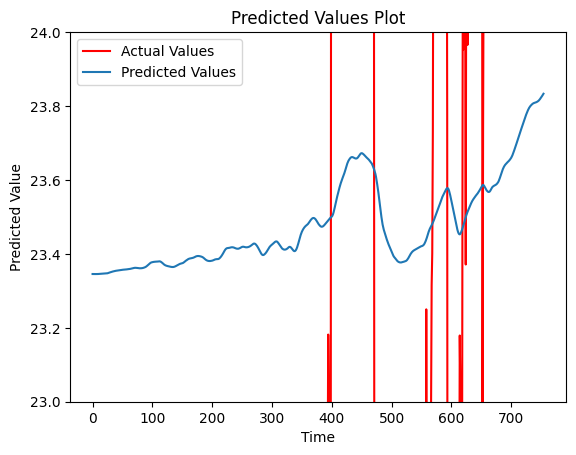

In [189]:
import matplotlib.pyplot as plt

plt.plot(y_test, 'r', label="Actual Values")
plt.plot(y_predicted, label="Predicted Values")
plt.title("Predicted Values Plot")
plt.xlabel("Time")
plt.ylabel("Predicted Value")
plt.ylim(23, 24)
plt.legend()
plt.show()



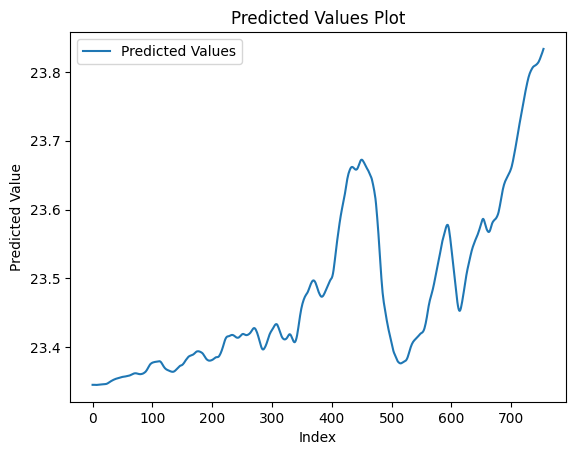

In [190]:


plt.plot(y_predicted, label="Predicted Values")
plt.title("Predicted Values Plot")
plt.xlabel("Index")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()
